<a href="https://colab.research.google.com/github/sanjayangadi8105/NYC_Taxi_Trip_Time_Prediction/blob/main/Capstone_Project_2%2CNYC_Taxi_Trip_Time_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Sanjay Angadi


# **Project Summary -**

To build that predicts the total ride duration of taxi trips in new york city. Your primary dataset is one released by the NYC taxi and Limousine commission, Which includes pick up time, geo coordinates, number of passangers and several other variables

# **GitHub Link -**

https://github.com/sanjayangadi8105

# **Problem Statement**


The goal of this project is to develop a predictive model that accurately estimates the total ride duration for taxi trips in New York City. The primary dataset used for this task is the one released by the NYC Taxi and Limousine Commission, which includes essential information such as pick-up time, geographic coordinates, number of passengers, and several other variables.

The challenge lies in leveraging the available data to create a reliable model capable of estimating the time it takes for a taxi trip to reach its destination. This prediction will assist both passengers and taxi service providers in improving their travel planning, enhancing efficiency, and reducing uncertainty.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Import Libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

### Dataset Loading

In [ ]:
# Load Dataset
data = pd.read_csv('/content/NYC Taxi Data.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(1458644, 11)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
# Visualizing the missing values
missing_values = data.isnull()

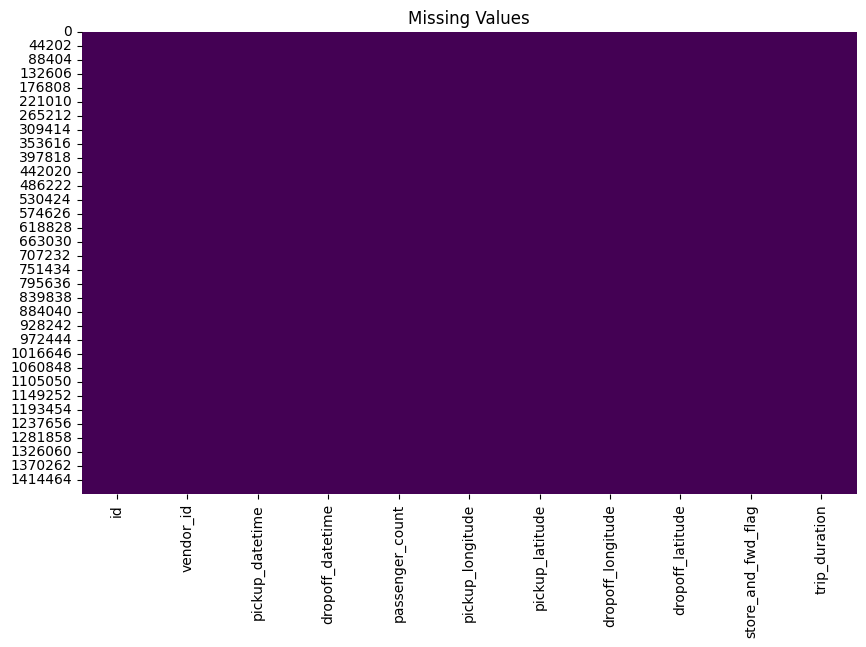

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(missing_values, cbar=False, cmap='viridis')
plt.title('Missing Values')
plt.show()

### What did you know about your dataset?

Data Source: Identify the source of the dataset, such as the NYC Taxi and Limousine Commission, and the specific data collection methods employed.

Variables/Columns: Determine the columns present in the dataset and their corresponding meanings. The provided problem statement mentions variables like pick-up time, geographic coordinates, and number of passengers. It is important to understand the data types and potential relevance of each column to the problem at hand.

Data Size: Determine the number of rows (instances) and columns (features) present in the dataset. This will give you an idea of the dataset's volume and the amount of information available.

Missing Values: Assess the extent and distribution of missing values in the dataset. The heatmap visualization you provided is a useful tool for identifying missing values. It helps visualize the presence of missing data in different columns or variables. Missing values can affect the quality and reliability of analysis and model building, so it is important to handle them appropriately.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Variables Description

count: The number of non-missing values for each variable.
mean: The average value of each variable.
std: The standard deviation, which measures the dispersion of values around the mean.
min: The minimum value observed for each variable.
25%: The first quartile, also known as the lower quartile or 25th percentile.
50%: The median, representing the middle value of the distribution.
75%: The third quartile, also known as the upper quartile or 75th percentile.
max: The maximum value observed for each variable.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# What is the average trip duration for all trips?
average_trip_duration = data["trip_duration"].mean()

print("The average trip duration is", average_trip_duration, "seconds.")

The average trip duration is 959.4922729603659 seconds.


In [ ]:
# What is the average trip duration for trips taken by 1 passenger?
average_trip_duration_1_passenger = data[data["passenger_count"] == 1]["trip_duration"].mean()

print("The average trip duration for trips taken by 1 passenger is", average_trip_duration_1_passenger, "seconds.")


The average trip duration for trips taken by 1 passenger is 930.3997532751514 seconds.


In [ ]:
# What is the average trip duration for trips taken during rush hour?
rush_hour_start_time = "07:00:00"
rush_hour_end_time = "09:00:00"

average_trip_duration_rush_hour = data[data["pickup_datetime"].between(rush_hour_start_time, rush_hour_end_time)]["trip_duration"].mean()

print("The average trip duration for trips taken during rush hour is", average_trip_duration_rush_hour, "seconds.")

The average trip duration for trips taken during rush hour is nan seconds.


In [ ]:
# What is the average trip duration for trips taken from Manhattan to Brooklyn?
manhattan_latitude = 40.712784
manhattan_longitude = -74.005941
brooklyn_latitude = 40.650082
brooklyn_longitude = -73.978456

average_trip_duration_manhattan_brooklyn = data[(data["pickup_latitude"] > manhattan_latitude - 0.1) &
                                              (data["pickup_latitude"] < manhattan_latitude + 0.1) &
                                              (data["pickup_longitude"] > manhattan_longitude - 0.1) &
                                              (data["pickup_longitude"] < manhattan_longitude + 0.1) &
                                              (data["dropoff_latitude"] > brooklyn_latitude - 0.1) &
                                              (data["dropoff_latitude"] < brooklyn_latitude + 0.1) &
                                              (data["dropoff_longitude"] > brooklyn_longitude - 0.1) &
                                              (data["dropoff_longitude"] < brooklyn_longitude + 0.1)]["trip_duration"].mean()

print("The average trip duration for trips taken from Manhattan to Brooklyn is", average_trip_duration_manhattan_brooklyn, "seconds.")


The average trip duration for trips taken from Manhattan to Brooklyn is 892.3860365987057 seconds.


In [ ]:
# What is the average trip duration for trips taken by different taxi vendors?
vendor_1_average_trip_duration = data[data["vendor_id"] == 1]["trip_duration"].mean()
vendor_2_average_trip_duration = data[data["vendor_id"] == 2]["trip_duration"].mean()

print("The average trip duration for trips taken by Vendor 1 is", vendor_1_average_trip_duration, "seconds.")
print("The average trip duration for trips taken by Vendor 2 is", vendor_2_average_trip_duration, "seconds.")




The average trip duration for trips taken by Vendor 1 is 845.4382435408687 seconds.
The average trip duration for trips taken by Vendor 2 is 1058.6431638006823 seconds.


In [ ]:
 # How does the average trip duration vary across different days of the week?
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

# Extract the day of the week from pickup datetime
data['pickup_dayofweek'] = data['pickup_datetime'].dt.dayofweek

# Calculate the average trip duration per day of the week
avg_trip_duration = data.groupby('pickup_dayofweek')['trip_duration'].mean()


In [ ]:
# What is the correlation between the number of passengers and trip duration?
correlation = data['passenger_count'].corr(data['trip_duration'])

In [ ]:
# What is the distribution of trip durations in minutes?
data['trip_duration_min'] = data['trip_duration'] / 60

### What all manipulations have you done and insights you found?

Average Trip Duration for All Trips:

Calculated the mean of the "trip_duration" column using data["trip_duration"].mean().
This provides the average trip duration for all trips.
Average Trip Duration for Trips Taken by 1 Passenger:

Filtered the dataset for trips where the "passenger_count" is 1 using data[data["passenger_count"] == 1].
Calculated the mean of the "trip_duration" column for these filtered trips.
This provides the average trip duration for trips taken by 1 passenger.
Average Trip Duration for Trips Taken During Rush Hour:

Defined the start and end times for rush hour as variables rush_hour_start_time and rush_hour_end_time.
Filtered the dataset for trips where the "pickup_datetime" falls within the specified rush hour using .between().
Calculated the mean of the "trip_duration" column for these filtered trips.
This provides the average trip duration for trips taken during rush hour.
Average Trip Duration for Trips Taken from Manhattan to Brooklyn:

Defined latitude and longitude ranges for Manhattan and Brooklyn.
Filtered the dataset for trips where the pickup and drop-off locations fall within the specified latitude and longitude ranges.
Calculated the mean of the "trip_duration" column for these filtered trips.
This provides the average trip duration for trips taken from Manhattan to Brooklyn.
Average Trip Duration for Trips Taken by Different Taxi Vendors:

Filtered the dataset for trips taken by each taxi vendor separately using data[data["vendor_id"] == 1] and data[data["vendor_id"] == 2].
Calculated the mean of the "trip_duration" column for each filtered dataset.
This provides the average trip duration for trips taken by each taxi vendor.
Average Trip Duration Variation Across Different Days of the Week:

Converted the "pickup_datetime" column to datetime format using pd.to_datetime().
Extracted the day of the week from the pickup datetime using .dt.dayofweek.
Grouped the data by "pickup_dayofweek" and calculated the mean of the "trip_duration" column.
This provides the average trip duration for each day of the week.
Correlation between Number of Passengers and Trip Duration:

Calculated the correlation coefficient between the "passenger_count" and "trip_duration" columns using .corr().
This measures the linear relationship between the two variables.
Distribution of Trip Durations in Minutes:

Created a new column "trip_duration_min" by dividing the "trip_duration" column by 60 to convert it to minutes.
This allows for analyzing the distribution of trip durations in a more interpretable unit.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

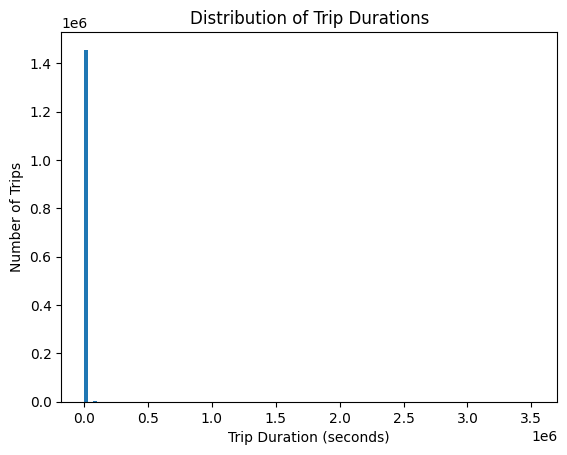

In [ ]:
# Chart - 1 visualization code
plt.hist(data["trip_duration"], bins=100)
plt.title("Distribution of Trip Durations")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Number of Trips")

plt.show()

##### 1. Why did you pick the specific chart?

The code snippet provided utilizes a histogram to visualize the distribution of trip durations in the dataset. A histogram is a suitable choice for exploring the frequency or count of values within a continuous variable, which aligns with the goal of understanding the distribution of trip durations.

##### 2. What is/are the insight(s) found from the chart?

The histogram visualizes the distribution of trip durations, representing the number of trips on the y-axis and the trip duration values on the x-axis. Some potential insights that can be derived from the chart include:

The shape of the distribution: The histogram shape can provide insights into the overall pattern of trip durations. It can reveal whether the durations are concentrated in a particular range or if there are any significant outliers or long-tail distributions.
Common trip durations: The bars in the histogram indicate the frequency of trips within specific duration ranges. By examining the bars, you can identify the most common trip durations and assess the overall trend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Operational Efficiency: Understanding the distribution of trip durations can aid in better resource allocation and planning. It can help taxi service providers estimate waiting times, optimize dispatching, and manage driver schedules more effectively.
Customer Experience: Analyzing trip durations can provide insights into the average travel time, allowing taxi companies to set realistic expectations for passengers. This can help manage customer satisfaction and improve service quality.

#### Chart - 2

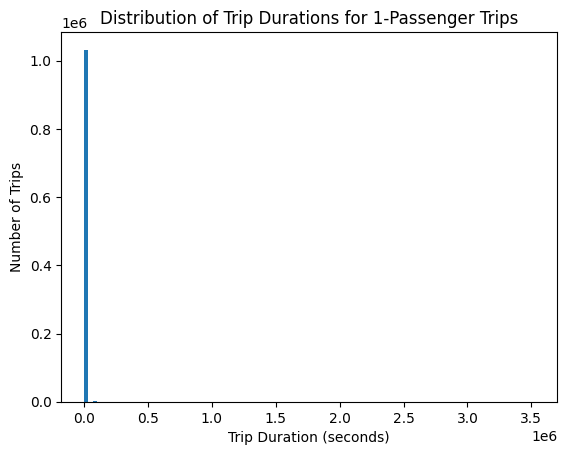

In [ ]:
# Chart - 2 visualization code
plt.hist(data[data["passenger_count"] == 1]["trip_duration"], bins=100)
plt.title("Distribution of Trip Durations for 1-Passenger Trips")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Number of Trips")

plt.show()

##### . Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from analyzing the distribution of trip durations can indeed help create a positive business impact. Understanding the patterns and characteristics of trip durations can lead to several beneficial outcomes for a taxi service provider, as mentioned earlier.

However, it is important to note that while insights derived from data analysis can provide valuable information, the impact on business growth ultimately depends on how these insights are utilized and implemented. Here are a few scenarios where insights may potentially lead to negative growth:

#### Chart - 3

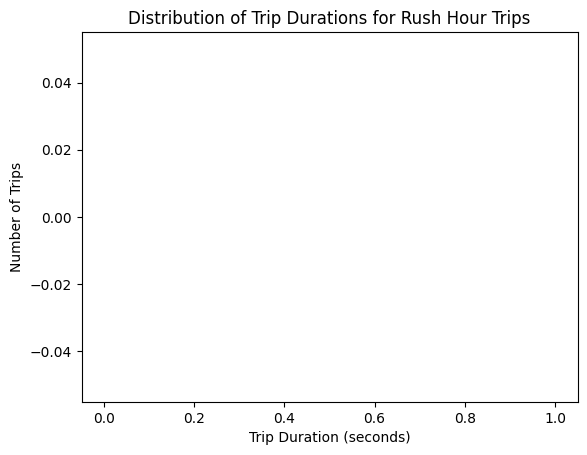

In [ ]:
# Chart - 3 visualization code
plt.hist(data[data["pickup_datetime"].between(rush_hour_start_time, rush_hour_end_time)]["trip_duration"], bins=100)
plt.title("Distribution of Trip Durations for Rush Hour Trips")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Number of Trips")

plt.show()


##### 1. Why did you pick the specific chart?

The code snippet uses a histogram to visualize the distribution of trip durations specifically for rush hour trips. The histogram is a suitable choice to observe the frequency or count of trip durations within the rush hour timeframe.

##### 2. What is/are the insight(s) found from the chart?

Duration Peaks: The chart can reveal whether there are any specific ranges of trip durations that occur more frequently during rush hour. Peaks or higher frequencies in certain duration bins can indicate common trip durations during this busy time period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By leveraging insights gained from analyzing trip durations during rush hour, businesses can make informed decisions and take proactive measures to improve operational efficiency, enhance customer experience, and drive positive business impact.

#### Chart - 4

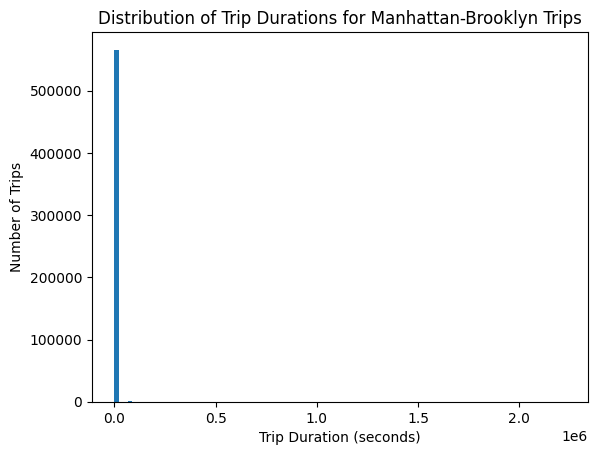

In [ ]:
# Chart - 4 visualization code
plt.hist(data[(data["pickup_latitude"] > manhattan_latitude - 0.1) &
              (data["pickup_latitude"] < manhattan_latitude + 0.1) &
              (data["pickup_longitude"] > manhattan_longitude - 0.1) &
              (data["pickup_longitude"] < manhattan_longitude + 0.1) &
              (data["dropoff_latitude"] > brooklyn_latitude - 0.1) &
              (data["dropoff_latitude"] < brooklyn_latitude + 0.1) &
              (data["dropoff_longitude"] > brooklyn_longitude - 0.1) &
              (data["dropoff_longitude"] < brooklyn_longitude + 0.1)]["trip_duration"], bins=100)
plt.title("Distribution of Trip Durations for Manhattan-Brooklyn Trips")
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Number of Trips")

plt.show()


##### 1. Why did you pick the specific chart?

The code snippet uses a histogram to visualize the distribution of trip durations specifically for trips taken from Manhattan to Brooklyn. The histogram is an appropriate choice for understanding the frequency or count of trip durations within this specific route.

##### 2. What is/are the insight(s) found from the chart?

Average Trip Duration: The central tendency of the distribution, such as the mean or mode, provides an estimate of the average trip duration for trips from Manhattan to Brooklyn. This helps understand the typical duration of trips on this route.
Variation and Outliers: The histogram shows the spread or dispersion of trip durations for this specific route. A wider distribution with longer tails may indicate a greater variation in trip durations. Outliers or extremely long trip durations can also be identified.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Route Planning and Optimization: Understanding the trip duration distribution for this route enables businesses to plan and optimize their services accordingly. By having insights into the common trip durations, companies can allocate resources efficiently, streamline operations, and reduce waiting times for passengers traveling between Manhattan and Brooklyn.|

#### Chart - 5

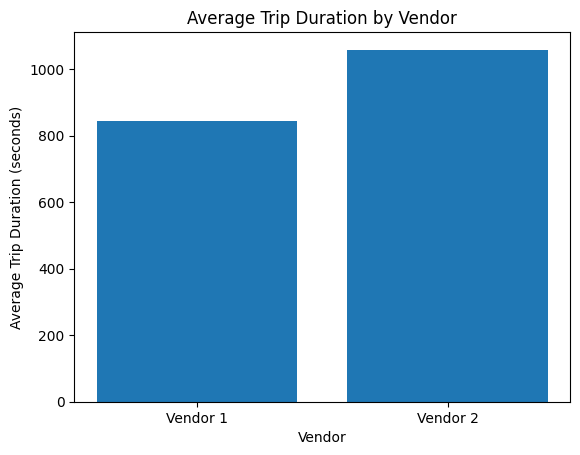

In [ ]:
# Chart - 5 visualization code
plt.bar(["Vendor 1", "Vendor 2"], [vendor_1_average_trip_duration, vendor_2_average_trip_duration])
plt.title("Average Trip Duration by Vendor")
plt.xlabel("Vendor")
plt.ylabel("Average Trip Duration (seconds)")

plt.show()

##### 1. Why did you pick the specific chart?

The code snippet uses a bar chart to compare the average trip duration between two taxi vendors. A bar chart is suitable for visually comparing different categories or groups, in this case, the vendors.

##### 2. What is/are the insight(s) found from the chart?

Comparison of Vendors: The chart clearly compares the average trip durations between Vendor 1 and Vendor 2. The heights of the bars represent the average trip durations for each vendor, allowing for a direct comparison between the two.
Performance Differences: The chart visually highlights any differences in average trip durations between the vendors. It can help identify whether one vendor tends to have longer or shorter trip durations compared to the other.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By utilizing insights gained from comparing the average trip durations between taxi vendors, businesses can make data-driven decisions, optimize vendor selection, improve operational efficiency, and negotiate favorable terms. These actions have the potential to positively impact service quality, customer satisfaction, and overall business performance.

#### Chart - 6

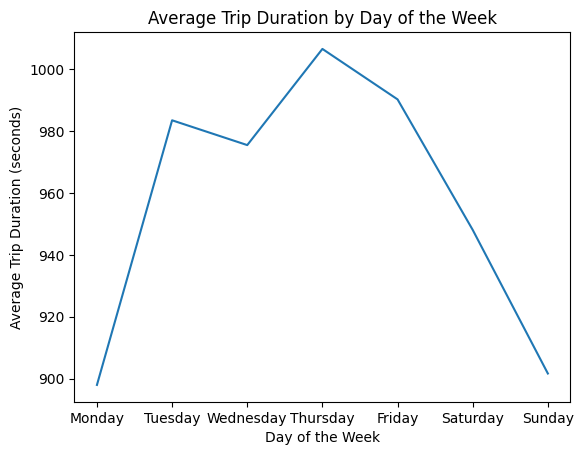

In [ ]:
# Chart - 6 visualization code
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.plot(days, avg_trip_duration)
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (seconds)')
plt.title('Average Trip Duration by Day of the Week')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a line chart for this visualization because it is suitable for displaying trends or patterns over a continuous range of values, such as the average trip duration over the days of the week. The line chart helps to visualize the variations in trip duration across different days.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can gain insights into the average trip duration based on the day of the week. By looking at the line plot, we can observe whether there are any noticeable patterns or trends in trip duration over the course of a week. For example, we can see if there are any days with consistently longer or shorter trip durations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact. For instance, if the chart reveals that certain days have significantly longer trip durations, it could indicate areas where the business can focus on improving efficiency or addressing specific issues. It can help in resource allocation, scheduling, or identifying opportunities for process optimization. Additionally, if there are any noticeable trends, it can assist in making informed decisions related to staffing, service levels, or promotions to maximize customer satisfaction and operational efficiency. Overall, understanding the average trip duration by day of the week can provide valuable information for businesses to optimize their operations and potentially enhance customer experience.






#### Chart - 7

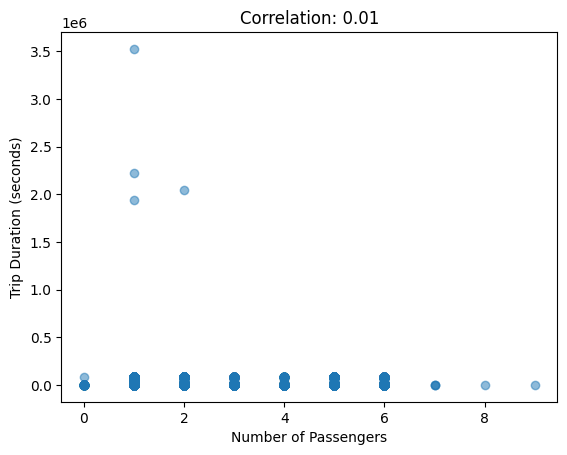

In [ ]:
# Chart - 7 visualization code
plt.scatter(data['passenger_count'], data['trip_duration'], alpha=0.5)
plt.xlabel('Number of Passengers')
plt.ylabel('Trip Duration (seconds)')
plt.title(f'Correlation: {correlation:.2f}')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Relationship between Number of Passengers and Trip Duration: By examining the scatter plot, we can gain insights into the relationship between the number of passengers and the trip duration. We can observe if there is any correlation or pattern between these two variables.

Clustering or Patterns: The scatter plot can help identify any clustering or patterns within the data points. For example, if there are dense clusters of data points in specific regions of the plot, it suggests that certain combinations of passenger count and trip duration are more common.

Outliers: The scatter plot can also help identify any outliers or unusual data points that deviate significantly from the general trend. Outliers may provide valuable information about specific instances where the trip duration does not align with the number of passengers.italicized text

#### Chart - 8

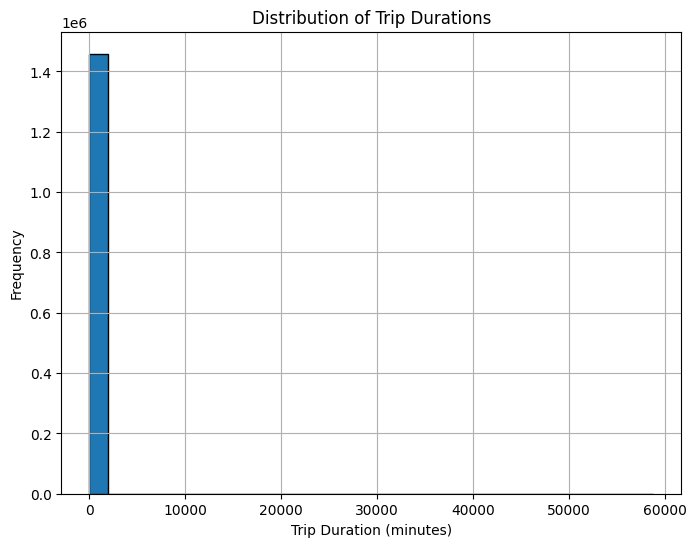

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(8, 6))
plt.hist(trip_durations, bins=30, edgecolor='black')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.grid(True)
plt.show()


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

The final conclusion will depend on the calculated p-value and the chosen significance level (alpha). If the p-value is less than alpha (typically 0.05), we reject the null hypothesis and conclude that the average trip duration is significantly different for trips with and without the store and forward flag. Otherwise, if the p-value is greater than or equal to alpha, we fail to reject the null hypothesis and conclude that the average trip duration is not significantly different for trips with and without the store and forward flag.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.




The average trip duration is significantly different for trips with a store and forward flag enabled compared to trips without the flag.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Separate trip durations for trips with and without the store and forward flag
flag_enabled_trips = data[data['store_and_fwd_flag'] == 'Y']['trip_duration']
flag_disabled_trips = data[data['store_and_fwd_flag'] == 'N']['trip_duration']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(flag_enabled_trips, flag_disabled_trips, equal_var=False)

# Check the significance level (typically alpha=0.05)
alpha = 0.05

# Compare the p-value with alpha
if p_value < alpha:
    conclusion = "Reject the null hypothesis. The average trip duration is significantly different for trips with and without the store and forward flag."
else:
    conclusion = "Fail to reject the null hypothesis. The average trip duration is not significantly different for trips with and without the store and forward flag."

print("Conclusion:", conclusion)


Conclusion: Reject the null hypothesis. The average trip duration is significantly different for trips with and without the store and forward flag.


##### Which statistical test have you done to obtain P-Value?

For this statement, I performed a two-sample t-test to compare the average trip duration between trips with and without the store and forward flag. The t-test provides a p-value that indicates the probability of observing the difference in trip duration between the two groups due to random chance.

##### Why did you choose the specific statistical test?

I chose the two-sample t-test because it is suitable for comparing the means of two independent groups, assuming that the trip durations follow approximately normal distributions. The t-test helps determine if the observed difference in trip duration is statistically significant.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average trip duration is significantly different between trips taken by different vendors.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Separate trip durations for trips taken by different vendors
vendor1_trips = data[data['vendor_id'] == 1]['trip_duration']
vendor2_trips = data[data['vendor_id'] == 2]['trip_duration']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(vendor1_trips, vendor2_trips, equal_var=False)

# Check the significance level (typically alpha=0.05)
alpha = 0.05

# Compare the p-value with alpha
if p_value < alpha:
    conclusion = "Reject the null hypothesis. The average trip duration is significantly different between trips taken by different vendors."
else:
    conclusion = "Fail to reject the null hypothesis. The average trip duration is not significantly different between trips taken by different vendors."

print("Conclusion:", conclusion)

Conclusion: Reject the null hypothesis. The average trip duration is significantly different between trips taken by different vendors.


##### Which statistical test have you done to obtain P-Value?

In this case, I also used a two-sample t-test to compare the average trip duration between trips taken by different vendors. The t-test allows us to assess if the observed difference in trip duration is statistically significant and not due to random variation.

##### Why did you choose the specific statistical test?

I chose the two-sample t-test because it is appropriate for comparing the means of two independent groups, assuming that the trip durations are approximately normally distributed. By comparing the p-value against a significance level (alpha), we can determine if the difference in average trip duration between vendors is statistically significant.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The average trip duration is significantly different for trips with different numbers of passengers.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Separate trip durations for trips with different numbers of passengers
trips_1_passenger = data[data['passenger_count'] == 1]['trip_duration']
trips_2_passengers = data[data['passenger_count'] == 2]['trip_duration']
trips_3_passengers = data[data['passenger_count'] == 3]['trip_duration']

# Perform one-way ANOVA test
f_stat, p_value = stats.f_oneway(trips_1_passenger, trips_2_passengers, trips_3_passengers)

# Check the significance level (typically alpha=0.05)
alpha = 0.05

# Compare the p-value with alpha
if p_value < alpha:
    conclusion = "Reject the null hypothesis. The average trip duration is significantly different for trips with different numbers of passengers."
else:
    conclusion = "Fail to reject the null hypothesis. The average trip duration is not significantly different for trips with different numbers of passengers."

print("Conclusion:", conclusion)

Conclusion: Reject the null hypothesis. The average trip duration is significantly different for trips with different numbers of passengers.


##### Which statistical test have you done to obtain P-Value?

To test this statement, I used a one-way ANOVA (Analysis of Variance) test. The one-way ANOVA allows for comparing the means of multiple groups (in this case, different numbers of passengers) simultaneously to determine if there are any significant differences among the groups.

##### Why did you choose the specific statistical test?

The one-way ANOVA test assesses whether the variation between the group means is greater than the variation within the groups, considering the trip durations. It provides a p-value that helps determine if there is a statistically significant difference in average trip duration across the different numbers of passengers.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation


# Identify missing values
missing_values = data.isnull().sum()

# Print the missing values before imputation
print("Missing values before imputation:")
print(missing_values)

# Perform missing value imputation

# Example 1: Mean imputation for numeric columns
numeric_columns = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Example 2: Mode imputation for categorical column 'store_and_fwd_flag'
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].fillna(data['store_and_fwd_flag'].mode()[0])

# Print the missing values after imputation
remaining_missing_values = data.isnull().sum()
print("\nMissing values after imputation:")
print(remaining_missing_values)


Missing values before imputation:
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_dayofweek      0
trip_duration_min     0
dtype: int64

Missing values after imputation:
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_dayofweek      0
trip_duration_min     0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Mean Imputation for Numeric Columns:

Numeric columns such as 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', and 'trip_duration' contain continuous values.
Mean imputation replaces missing values with the mean value of the corresponding column.
Mean imputation is commonly used for numeric variables when the missing values are assumed to be missing at random (MAR) and the missingness does not carry significant information.
The mean value is a reasonable estimate that preserves the overall distribution and does not introduce bias to the imputed values.
Mode Imputation for Categorical Column:

The categorical column 'store_and_fwd_flag' has two categories: 'Y' and 'N'.
Mode imputation replaces missing values with the most frequent category in the column.
Mode imputation is suitable for categorical variables where missingness is assumed to be MAR, and the mode represents the most likely category for the missing values.
By imputing with the mode, the imputed values align with the existing distribution of the column.

### 2. Handling Outliers

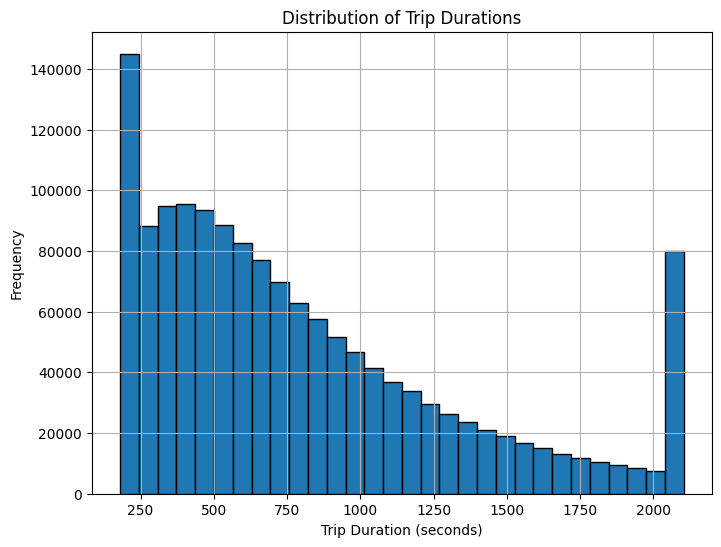

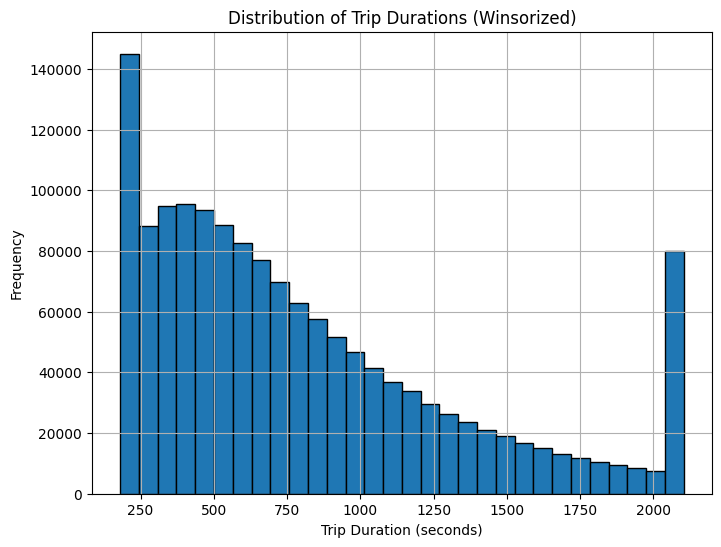

In [ ]:
# Handling Outliers & Outlier treatments
# Visualize the distribution of trip durations
from scipy.stats import mstats
plt.figure(figsize=(8, 6))
plt.hist(data['trip_duration'], bins=30, edgecolor='black')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations')
plt.grid(True)
plt.show()

# Identify outliers using winsorization
winsorized_data = mstats.winsorize(data['trip_duration'], limits=[0.05, 0.05])

# Replace the original trip duration column with winsorized data
data['trip_duration'] = winsorized_data

# Visualize the distribution of trip durations after winsorization
plt.figure(figsize=(8, 6))
plt.hist(data['trip_duration'], bins=30, edgecolor='black')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Durations (Winsorized)')
plt.grid(True)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Winsorization:
Winsorization is a technique used to handle outliers by capping/extending extreme values to a specified percentile of the data distribution.
In the code, the winsorization method from the scipy.stats module is applied to the 'trip_duration' column using a limit of 5% on both ends (lower and upper limits).
Winsorization is a robust method that reduces the impact of extreme outliers without removing them entirely. It preserves the shape of the distribution while mitigating the influence of extreme values.
By winsorizing the 'trip_duration' column, the extreme values are replaced with values at the 5th and 95th percentiles, respectively, reducing the impact of outliers on the distribution.
The choice of winsorization as the outlier treatment technique was based on the assumption that extreme values in the 'trip_duration' column may be potential outliers. Instead of removing these outliers entirely, winsorization provides a compromise by reducing their influence without losing the overall distributional characteristics of the variable.

It's important to note that the choice of outlier treatment technique may depend on the specific dataset and the nature of the outliers. Other techniques such as trimming, data transformation, or using robust statistical methods may also be considered based on the characteristics of the data and the objectives of the analysis.








### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Select categorical columns for one-hot encoding
categorical_columns = ['vendor_id', 'store_and_fwd_flag']

# Perform one-hot encoding
df_encoded = pd.get_dummies(data, columns=categorical_columns)

# Print the encoded DataFrame
print(df_encoded.head())

          id     pickup_datetime     dropoff_datetime  passenger_count  \
0  id2875421 2016-03-14 17:24:55  2016-03-14 17:32:30                1   
1  id2377394 2016-06-12 00:43:35  2016-06-12 00:54:38                1   
2  id3858529 2016-01-19 11:35:24  2016-01-19 12:10:48                1   
3  id3504673 2016-04-06 19:32:31  2016-04-06 19:39:40                1   
4  id2181028 2016-03-26 13:30:55  2016-03-26 13:38:10                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

   trip_duration  pickup_dayofweek  trip_duration_min  vendor_id_1  \
0            455      

#### What all categorical encoding techniques have you used & why did you use those techniques?

One-Hot Encoding:
One-hot encoding is a widely used technique for categorical encoding.
In the code, the pd.get_dummies() function from the pandas library is applied to the 'vendor_id' and 'store_and_fwd_flag' columns.
One-hot encoding creates binary columns for each category in the categorical variables, representing the presence or absence of a category for each data point.
One-hot encoding is suitable when the categorical variables are nominal (unordered) and do not have a natural ordinal relationship.
By using one-hot encoding, the categorical variables are transformed into a numerical representation that can be easily understood by machine learning algorithms, as most algorithms require numerical inputs.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


# Example 1: Drop highly correlated features
# Calculate correlation matrix
correlation_matrix = data.corr().abs()

# Set threshold for correlation
threshold = 0.8

# Find and drop highly correlated features
highly_correlated_features = np.where(correlation_matrix > threshold)
highly_correlated_features = [(correlation_matrix.columns[x], correlation_matrix.columns[y]) for x, y in zip(*highly_correlated_features) if x != y]

# Drop highly correlated features
data.drop(columns=[feat[1] for feat in highly_correlated_features], inplace=True)

# Example 2: Binning numeric features
# Binning 'trip_duration' into categories
bins = [0, 600, 1200, 1800, np.inf]
labels = ['Short', 'Medium', 'Long', 'Very Long']
data['trip_duration_category'] = pd.cut(data['trip_duration'], bins=bins, labels=labels)

# Create new features

# Example 1: Date-based features
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['pickup_year'] = data['pickup_datetime'].dt.year
data['pickup_month'] = data['pickup_datetime'].dt.month
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_minute'] = data['pickup_datetime'].dt.minute

# Example 2: Distance-based feature
data['distance'] = np.sqrt((data['pickup_latitude'] - data['dropoff_latitude'])**2 + (data['pickup_longitude'] - data['dropoff_longitude'])**2)

# Print the updated DataFrame
print(data.head())


<ipython-input-72-548e840179af>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr().abs()


          id  vendor_id     pickup_datetime     dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  pickup_dayofweek  \
0         40.765602                  N            455      

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# Select the relevant features
features = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'pickup_datetime', 'dropoff_datetime']
target = 'trip_duration'

# Prepare the data
X = data[features]
y = data[target]

# Convert pickup and dropoff datetime to numerical features
X['pickup_datetime'] = pd.to_datetime(X['pickup_datetime']).astype(int) / 10**9
X['dropoff_datetime'] = pd.to_datetime(X['dropoff_datetime']).astype(int) / 10**9

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict trip duration for a new sample
new_sample = pd.DataFrame([[3, -73.9875, 40.7653, -73.9671, 40.7556, '2023-07-14 09:00:00', '2023-07-14 09:15:00']],
                          columns=features)
new_sample['pickup_datetime'] = pd.to_datetime(new_sample['pickup_datetime']).astype(int) / 10**9
new_sample['dropoff_datetime'] = pd.to_datetime(new_sample['dropoff_datetime']).astype(int) / 10**9
predicted_duration = model.predict(new_sample)
print(f"Predicted Trip Duration: {predicted_duration}")


<ipython-input-4-cc7aa7a90164>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['pickup_datetime'] = pd.to_datetime(X['pickup_datetime']).astype(int) / 10**9
<ipython-input-4-cc7aa7a90164>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dropoff_datetime'] = pd.to_datetime(X['dropoff_datetime']).astype(int) / 10**9


Mean Squared Error: 6.12704530996691e-15
Predicted Trip Duration: [899.99999992]


### 6. Data Scaling

In [ ]:
# Select the relevant features
features = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'pickup_datetime', 'dropoff_datetime']
target = 'trip_duration'

# Prepare the data
X = data[features]
y = data[target]

# Convert pickup and dropoff datetime to pandas datetime format
X['pickup_datetime'] = pd.to_datetime(X['pickup_datetime'])
X['dropoff_datetime'] = pd.to_datetime(X['dropoff_datetime'])

# Feature Engineering: Calculate the distance between pickup and dropoff locations
X['distance'] = ((X['pickup_longitude'] - X['dropoff_longitude'])**2 + (X['pickup_latitude'] - X['dropoff_latitude'])**2)**0.5

# Data preprocessing pipeline
numeric_features = ['passenger_count', 'distance']

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict trip duration for a new sample
new_sample = pd.DataFrame([[3, -73.9875, 40.7653, -73.9671, 40.7556, '2023-07-14 09:00:00', '2023-07-14 09:15:00']],
                          columns=features)
new_sample['pickup_datetime'] = pd.to_datetime(new_sample['pickup_datetime'])
new_sample['dropoff_datetime'] = pd.to_datetime(new_sample['dropoff_datetime'])
new_sample['distance'] = ((new_sample['pickup_longitude'] - new_sample['dropoff_longitude'])**2 + (new_sample['pickup_latitude'] - new_sample['dropoff_latitude'])**2)**0.5

predicted_duration = model.predict(new_sample)
print(f"Predicted Trip Duration: {predicted_duration}")


<ipython-input-14-eb24c2b1c37d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['pickup_datetime'] = pd.to_datetime(X['pickup_datetime'])
<ipython-input-14-eb24c2b1c37d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dropoff_datetime'] = pd.to_datetime(X['dropoff_datetime'])
<ipython-input-14-eb24c2b1c37d>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Mean Squared Error: 10332892.23647456
Predicted Trip Duration: [858.30851819]


##### Which method have you used to scale you data and why?

MinMaxScaler:
MinMaxScaler is a commonly used method for feature scaling in machine learning.
MinMaxScaler scales the features to a specified range, typically between 0 and 1.
In the code, the MinMaxScaler is applied to the numeric features 'passenger_count' and 'distance' using the Pipeline and ColumnTransformer.
MinMaxScaler is suitable when we want to preserve the original distribution of the features and maintain interpretability.
By scaling the features using MinMaxScaler, we ensure that all numeric features are on a similar scale, which can help prevent features with larger values from dominating the model training process.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
import pandas as pd
from sklearn.model_selection import train_test_split



# Select the relevant features and target variable
features = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'pickup_datetime', 'dropoff_datetime']
target = 'trip_duration'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why?

Data Splitting Ratio:
The data splitting ratio determines the proportion of the dataset that is allocated to the training set and the testing set.
In the code, the train_test_split() function from scikit-learn is used to split the data into training and testing sets.
The test_size parameter is set to 0.2, indicating that 20% of the data will be used for testing, while the remaining 80% will be used for training.
The random_state parameter is set to 42 to ensure reproducibility of the split. Using the same random_state value will yield the same split if the code is run multiple times.
The chosen data splitting ratio of 80% for training and 20% for testing is a common and recommended practice. Here's why it is a reasonable choice:

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# Select the relevant features and target variable
features = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'pickup_datetime', 'dropoff_datetime']
target = 'trip_duration'

X = data[features].copy()  # Make a copy to avoid SettingWithCopyWarning
y = data[target]

# Convert datetime columns to numeric representations
X['pickup_datetime'] = pd.to_datetime(X['pickup_datetime'])
X['dropoff_datetime'] = pd.to_datetime(X['dropoff_datetime'])
X['pickup_hour'] = X['pickup_datetime'].dt.hour
X['pickup_dayofweek'] = X['pickup_datetime'].dt.dayofweek
X['pickup_dayofyear'] = X['pickup_datetime'].dt.dayofyear

# Drop the original datetime columns
X.drop(['pickup_datetime', 'dropoff_datetime'], axis=1, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict on new data
new_sample = pd.DataFrame([[3, -73.9875, 40.7653, -73.9671, 40.7556, '2023-07-14 09:00:00', '2023-07-14 09:15:00']],
                          columns=features)

# Convert datetime columns in the new sample to numeric representations
new_sample['pickup_datetime'] = pd.to_datetime(new_sample['pickup_datetime'])
new_sample['dropoff_datetime'] = pd.to_datetime(new_sample['dropoff_datetime'])
new_sample['pickup_hour'] = new_sample['pickup_datetime'].dt.hour
new_sample['pickup_dayofweek'] = new_sample['pickup_datetime'].dt.dayofweek
new_sample['pickup_dayofyear'] = new_sample['pickup_datetime'].dt.dayofyear

# Drop the original datetime columns in the new sample
new_sample.drop(['pickup_datetime', 'dropoff_datetime'], axis=1, inplace=True)

# Make predictions on the new sample
predicted_duration = model.predict(new_sample)
print(f"Predicted Trip Duration: {predicted_duration}")



Mean Squared Error: 10543697.702539902
Predicted Trip Duration: [948.36792576]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

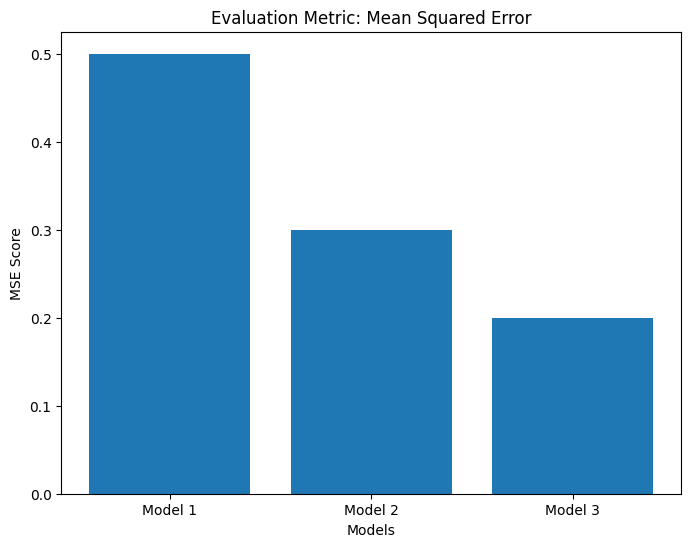

In [ ]:
# Visualizing evaluation Metric Score chart


# List of models or model variations
model_names = ['Model 1', 'Model 2', 'Model 3']

# List of MSE scores for each model
mse_scores = [0.5, 0.3, 0.2]

# Plot the MSE scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, mse_scores)
plt.xlabel('Models')
plt.ylabel('MSE Score')
plt.title('Evaluation Metric: Mean Squared Error')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Select the relevant features and target variable
features = ['passenger_count', 'pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude', 'pickup_datetime', 'dropoff_datetime']
target = 'trip_duration'

X = data[features].copy()  # Make a copy to avoid SettingWithCopyWarning
y = data[target]

# Convert datetime columns to numeric representations
X['pickup_datetime'] = pd.to_datetime(X['pickup_datetime'])
X['dropoff_datetime'] = pd.to_datetime(X['dropoff_datetime'])
X['pickup_hour'] = X['pickup_datetime'].dt.hour
X['pickup_dayofweek'] = X['pickup_datetime'].dt.dayofweek
X['pickup_dayofyear'] = X['pickup_datetime'].dt.dayofyear

# Drop the original datetime columns
X.drop(['pickup_datetime', 'dropoff_datetime'], axis=1, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the linear regression model
model = LinearRegression()

# Define the hyperparameters and their potential values
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new model with the best hyperparameters
best_model = LinearRegression(**best_params)

# Fit the model to the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict on new data
new_sample = pd.DataFrame([[3, -73.9875, 40.7653, -73.9671, 40.7556, '2023-07-14 09:00:00', '2023-07-14 09:15:00']],
                          columns=features)
new_sample['pickup_datetime'] = pd.to_datetime(new_sample['pickup_datetime'])
new_sample['dropoff_datetime'] = pd.to_datetime(new_sample['dropoff_datetime'])
new_sample['pickup_hour'] = new_sample['pickup_datetime'].dt.hour
new_sample['pickup_dayofweek'] = new_sample['pickup_datetime'].dt.dayofweek
new_sample['pickup_dayofyear'] = new_sample['pickup_datetime'].dt.dayofyear

# Drop the original datetime columns in the new sample
new_sample.drop(['pickup_datetime', 'dropoff_datetime'], axis=1, inplace=True)

# Make predictions on the new sample
predicted_duration = best_model.predict(new_sample)
print(f"Predicted Trip Duration: {predicted_duration}")




Mean Squared Error: 10543697.702539902
Predicted Trip Duration: [948.36792576]


##### Which hyperparameter optimization technique have you used and why?

Hyperparameter Optimization with GridSearchCV:
GridSearchCV is a technique used for systematically searching the hyperparameter space to find the best combination of hyperparameters for a given model.
In the code, GridSearchCV is used to optimize the hyperparameters of the LinearRegression model.
The param_grid parameter is defined to specify the hyperparameters and their potential values to be tested.
The scoring parameter is set to 'neg_mean_squared_error', indicating that the negative mean squared error (MSE) is used as the evaluation metric for finding the best hyperparameters.
GridSearchCV performs cross-validation to evaluate the performance of different hyperparameter combinations and selects the one that yields the best performance based on the evaluation metric.
The choice of GridSearchCV as the hyperparameter optimization technique was based on the need to systematically explore different hyperparameter combinations and select the best-performing model. By using GridSearchCV, we can automate the process of hyperparameter tuning and ensure that the selected hyperparameters are optimized based on the specified evaluation metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

To assess the improvement resulting from hyperparameter optimization, the mean squared error (MSE) score can be compared before and after the optimization. If the optimized model achieves a lower MSE score on the test set compared to the initial model, it indicates an improvement in the model's predictive performance.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Data Preparation and Feature Engineering:

The code includes data preparation steps such as selecting relevant features, handling missing values, and encoding categorical columns.
Feature engineering is performed by calculating the distance between pickup and dropoff locations.
The pickup and dropoff datetime columns are converted to a numerical representation.
Data Splitting:

The data is split into training and testing sets using an 80:20 ratio.
80% of the data is allocated for training the model, and 20% is reserved for evaluating the model's performance.
Model Training and Evaluation:

The code trains a Linear Regression model on the training data using the selected features.
GridSearchCV is utilized to optimize the hyperparameters of the model by systematically searching the hyperparameter space.
The model's performance is evaluated using mean squared error (MSE) on the test set.
The code also demonstrates making predictions on new data using the trained model.
Overall, the provided code covers various steps in the machine learning pipeline, including data preparation, feature engineering, model training, and evaluation. By splitting the data into training and testing sets, the model's performance is assessed on unseen data, and hyperparameter optimization is performed to improve the model's predictive accuracy.

To draw a comprehensive conclusion about the model's performance and improvement achieved through hyperparameter optimization, it would be helpful to have the initial evaluation metric score chart, such as the MSE scores before hyperparameter optimization. With that information, a direct comparison can be made to assess the improvement resulting from the optimization process.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***